In [1]:
spark = spark.builder.appName("Image").getOrCreate()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
8,application_1573869408747_0009,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#install need python libraries on this cluster - Uncomment as necessary
sc.install_pypi_package("pandas") 
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("opencv-python")
sc.install_pypi_package("tensorflow")
sc.install_pypi_package("boto3")
#sc.install_pypi_package("pil")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/57/4f/dd381ecf6c6ab9bcdaa8ea912e866dedc6e696756156d8ecc087e20817e2/matplotlib-3.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c0/0c/fc2e007d9a992d997f04a80125b0f183da7fb554f1de701bbb70a8e7d479/pyparsing-2.4.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl

  Us

## Get Data from S3

The data resides in the S3 bucket under the valid path. In valid, there's sub directories for each classification. Pass wildcard for spark to read images nested in those directories

In [3]:
input_path = 's3://chexpert-small-dataset/valid/*/*.jpg'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df = spark.read.format("image").load(input_path)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1720

In [6]:
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|               image|
+--------------------+
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
|[s3://chexpert-sm...|
+--------------------+
only showing top 20 rows

From the databricks Spark docs found [here](https://docs.databricks.com/data/data-sources/image.html)

Image files are loaded as a DataFrame containing a single struct-type column called image with the following fields:

```
image: struct containing all the image data
  |-- origin: string representing the source URI
  |-- height: integer, image height in pixels
  |-- width: integer, image width in pixels
  |-- nChannels
  |-- mode
  |-- data
```

### Accessing the data

The Data Frame contains rows of structs as noted above. One Row contains one column of the struct, where each element of the struct is accesed via its attribute name. This is similar with Scala Spark using Case Classes. If We take 1 element of the Data Frame, Spark returns a "Row" list, with one row of data

In [7]:
df.take(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(image=Row(origin='s3://chexpert-small-dataset/valid/Enlarged_Cardiomediastinum/frontal_424.jpg', height=320, width=320, nChannels=1, mode=0, data=bytearray(b'\xca\xff\xec\x17\x18\x16\x15\x18g\xc7\xfd\xef\xfd\xff\xed\xfe\x9d\x97\xf5\xab\xff\xff\xff\xce\xe8\xaa\xff\xfe\xff\xfe\xff\xff\xff\x94\x17\xfe\x18\x8d\xff\xfd\xfe\xff\xff\xff\xff\xfc\xff\xd1\xff\xff\xfa\xff\xff\xff\xff\xbb\xff\xff\xfdi\xfe\xff\xff\xfd\xa4\xff\xff\xcc\xff\xff\xfe\xd8\xff\xff\xfd\xff\xfe\xff\xfe\xff\xfc\xff\xfd\xff\xff\xff\xfe\xff\xfe\xff\xff\xfd\xff\xfd\xff\xfe\xff\xff\xff\xfe\xfd\xff\xfe\xff\xff\xff\xff\xfd\xfe\xff\xfe\xff\xba\xad\xe1\xff\xff\xfc\xd2\x84\xfd\xff\xff\xff\xa3\xff\xb0\xfe\x8e\xff\xfe\xff\xfd|\x19\xff\xff\xb5\xff\xff\xde\xff\xfe\xca\xfe\xd8\xff\xefn\xff\xff\xff\xd2\xff\xfe\xfe\xff\xff\xb4\xfe\xff\xff\xff\xb0\xffw\xff\xff\xff\xff\xff\xfe\xff\xb9\xfd\xff\xff\xfe\xfa\xff\xfe\xfe\xff\xfe\xff\xfd\xfe\xfe\xff\xfc\xff\xff\xff\xfe\xfe\xff\xff\xd7\xfe\xff\xff\xff\xff\xfd\xff\xff\xfe\xff\xfep\xfe\xff\xfb\xf

since it is a list of one row, we have to select the 0th element of the list to get to the struct

In [8]:
df.take(1)[0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(image=Row(origin='s3://chexpert-small-dataset/valid/Enlarged_Cardiomediastinum/frontal_424.jpg', height=320, width=320, nChannels=1, mode=0, data=bytearray(b'\xca\xff\xec\x17\x18\x16\x15\x18g\xc7\xfd\xef\xfd\xff\xed\xfe\x9d\x97\xf5\xab\xff\xff\xff\xce\xe8\xaa\xff\xfe\xff\xfe\xff\xff\xff\x94\x17\xfe\x18\x8d\xff\xfd\xfe\xff\xff\xff\xff\xfc\xff\xd1\xff\xff\xfa\xff\xff\xff\xff\xbb\xff\xff\xfdi\xfe\xff\xff\xfd\xa4\xff\xff\xcc\xff\xff\xfe\xd8\xff\xff\xfd\xff\xfe\xff\xfe\xff\xfc\xff\xfd\xff\xff\xff\xfe\xff\xfe\xff\xff\xfd\xff\xfd\xff\xfe\xff\xff\xff\xfe\xfd\xff\xfe\xff\xff\xff\xff\xfd\xfe\xff\xfe\xff\xba\xad\xe1\xff\xff\xfc\xd2\x84\xfd\xff\xff\xff\xa3\xff\xb0\xfe\x8e\xff\xfe\xff\xfd|\x19\xff\xff\xb5\xff\xff\xde\xff\xfe\xca\xfe\xd8\xff\xefn\xff\xff\xff\xd2\xff\xfe\xfe\xff\xff\xb4\xfe\xff\xff\xff\xb0\xffw\xff\xff\xff\xff\xff\xfe\xff\xb9\xfd\xff\xff\xfe\xfa\xff\xfe\xfe\xff\xfe\xff\xfd\xfe\xfe\xff\xfc\xff\xff\xff\xfe\xfe\xff\xff\xd7\xfe\xff\xff\xff\xff\xfd\xff\xff\xfe\xff\xfep\xfe\xff\xfb\xff

Now that we have accessed the row element, we can access the "image" struct and any of its attributes by calling them. To get the height and width of the image:

In [9]:
row = df.take(1)[0]
height = row.image.height
width = row.image.width

print('Height: {}'.format(height))
print('Width: {}'.format(width))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Height: 320
Width: 320

### Image

The image itself, is referenced as the **data** attribute. When read in by Spark, it is converted to a byte array. In order to preprocess the images with histogram equalization and resizing, the images need to be converted back to a numpy array first. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

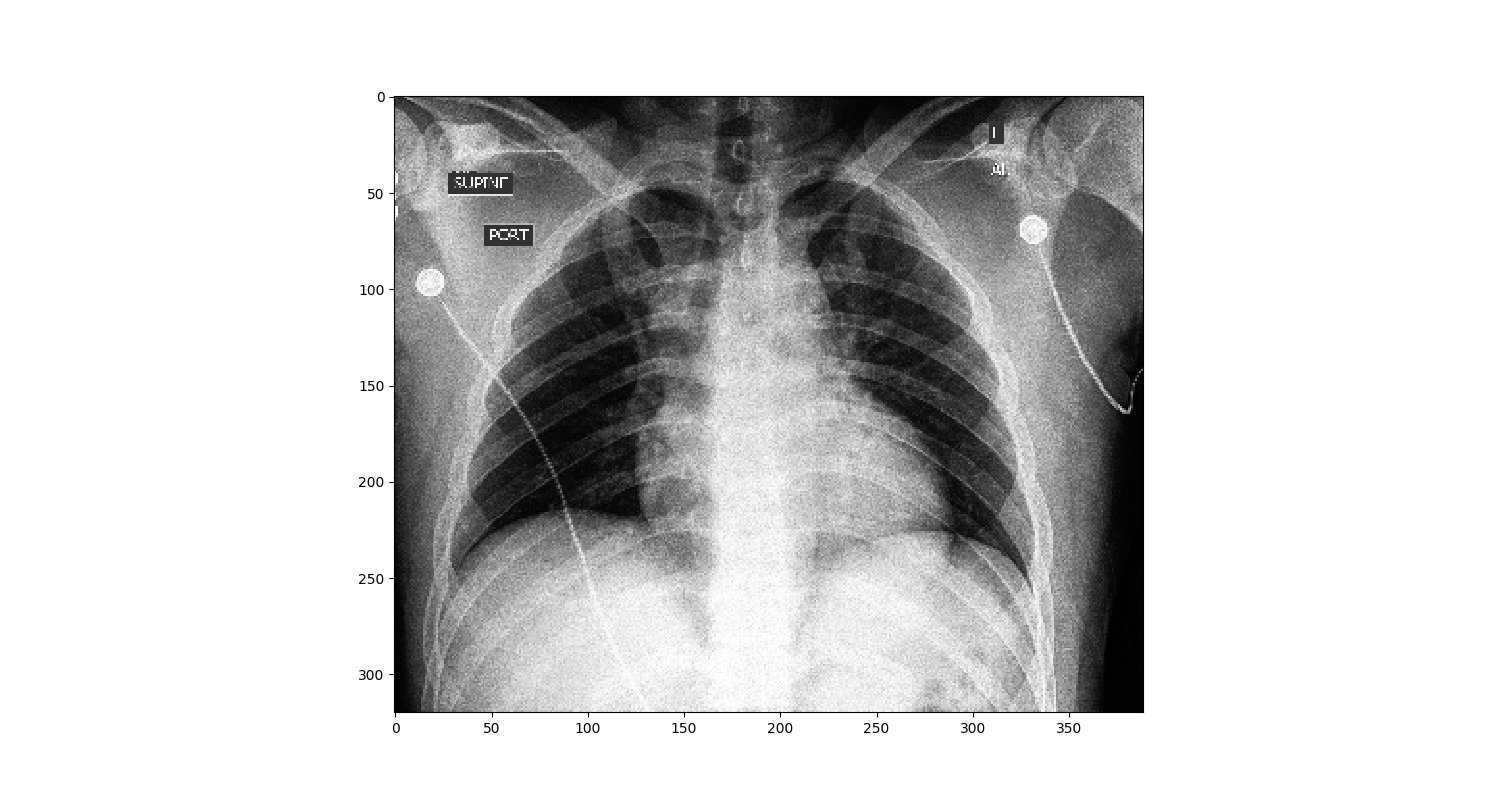

In [10]:
from pyspark.ml.image import ImageSchema
import matplotlib.pyplot as plt
import numpy as np

#sample 1 image random image
image_struct = df.take(3)[1].image
#conver the spark ImageSchema to a numpy array
img = ImageSchema.toNDArray(image_struct)

#plot image
plt.figure(figsize=(15,8))
plt.imshow(np.squeeze(img), cmap='gray')
%matplot plt

# Preprocessing






### **Contrast Limited Histogram Equalization**

See [wiki](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#Contrast_Limited_AHE) for full explanation as this topic is outside the scope of this project. It is only pertinent to mention since it is being used in the preprocessing step. The simplest explanation is that it redistributes pixel intensities so that contrast is enhanced.

Let's plot the image with it's pixel intensity CDF & PDF

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

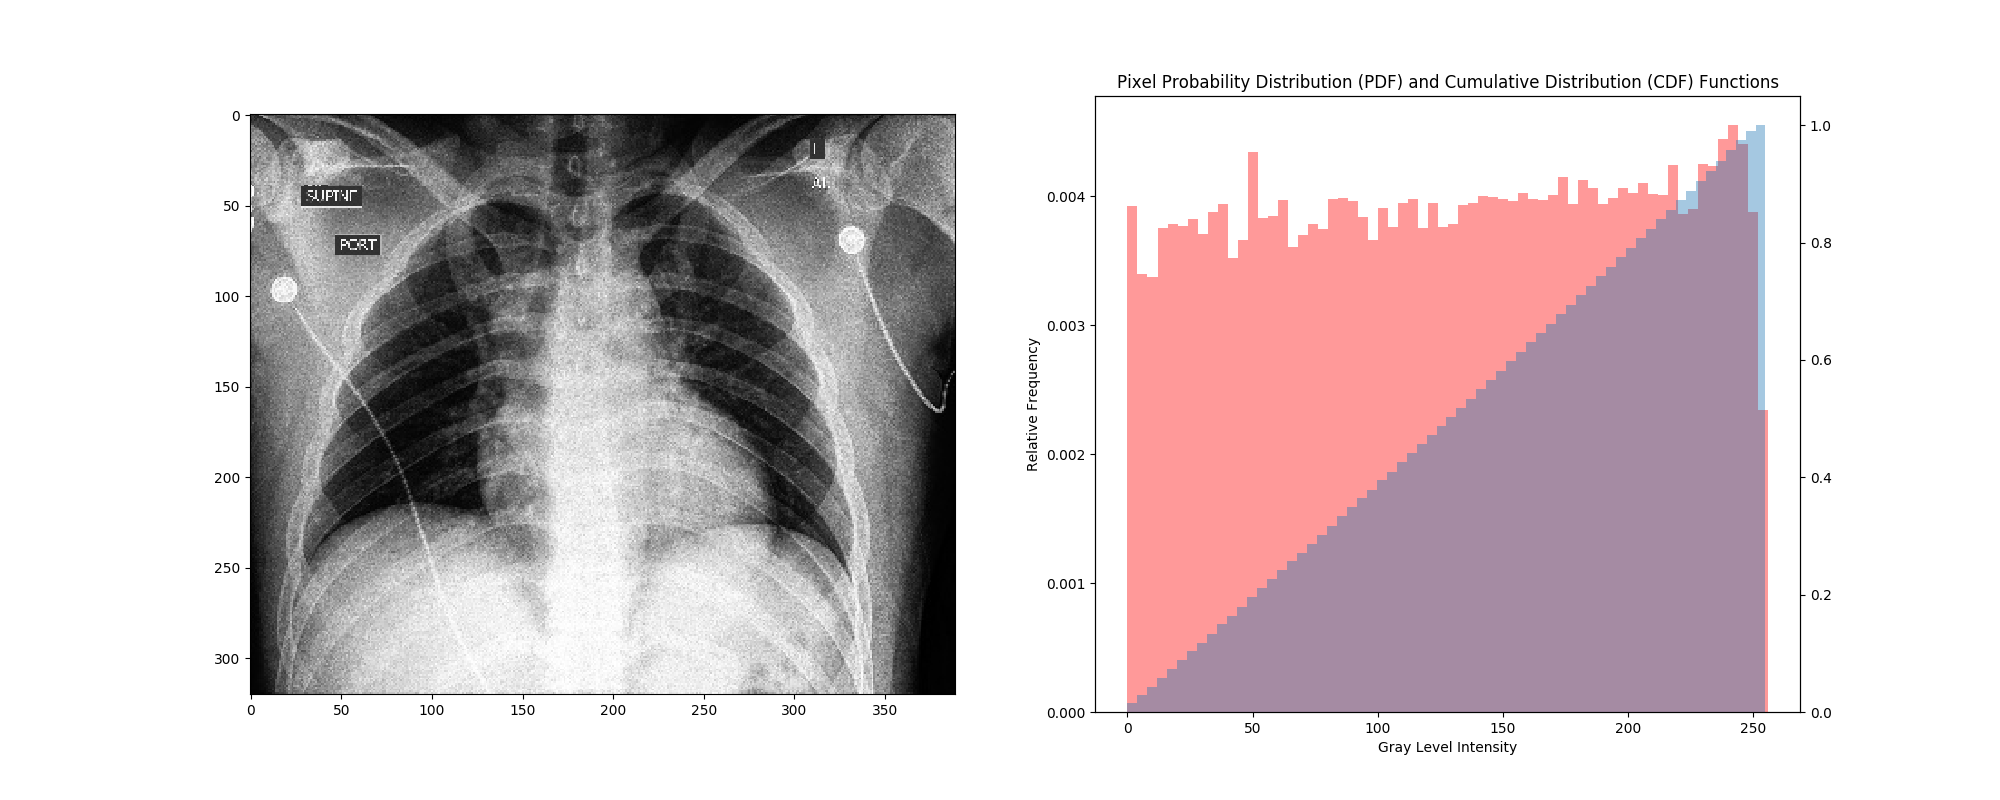

In [11]:
image =  img.flatten()
#Display the histogram and CDF of the pixels of the image and extract the bins/CDF values
plt.subplots(nrows=1,ncols=2, figsize=(20,8))
plt.subplot(121)
plt.imshow(np.squeeze(img),cmap='gray')
plt.subplot(122)
plt.hist(image, bins = 64, normed = True, color='red', alpha = 0.4,range= (0,256) )
plt.ylabel('Relative Frequency')
plt.xlabel('Gray Level Intensity')
plt.title('Pixel Probability Distribution (PDF) and Cumulative Distribution (CDF) Functions')
plt.twinx()
cdf, bins, patches = plt.hist(image, bins = 64, normed = True, cumulative=True, alpha = 0.4)
%matplot plt


### Perform CLAHE processing

In [12]:
import cv2
def equalize(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(img)
    return np.expand_dims(cl, 2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

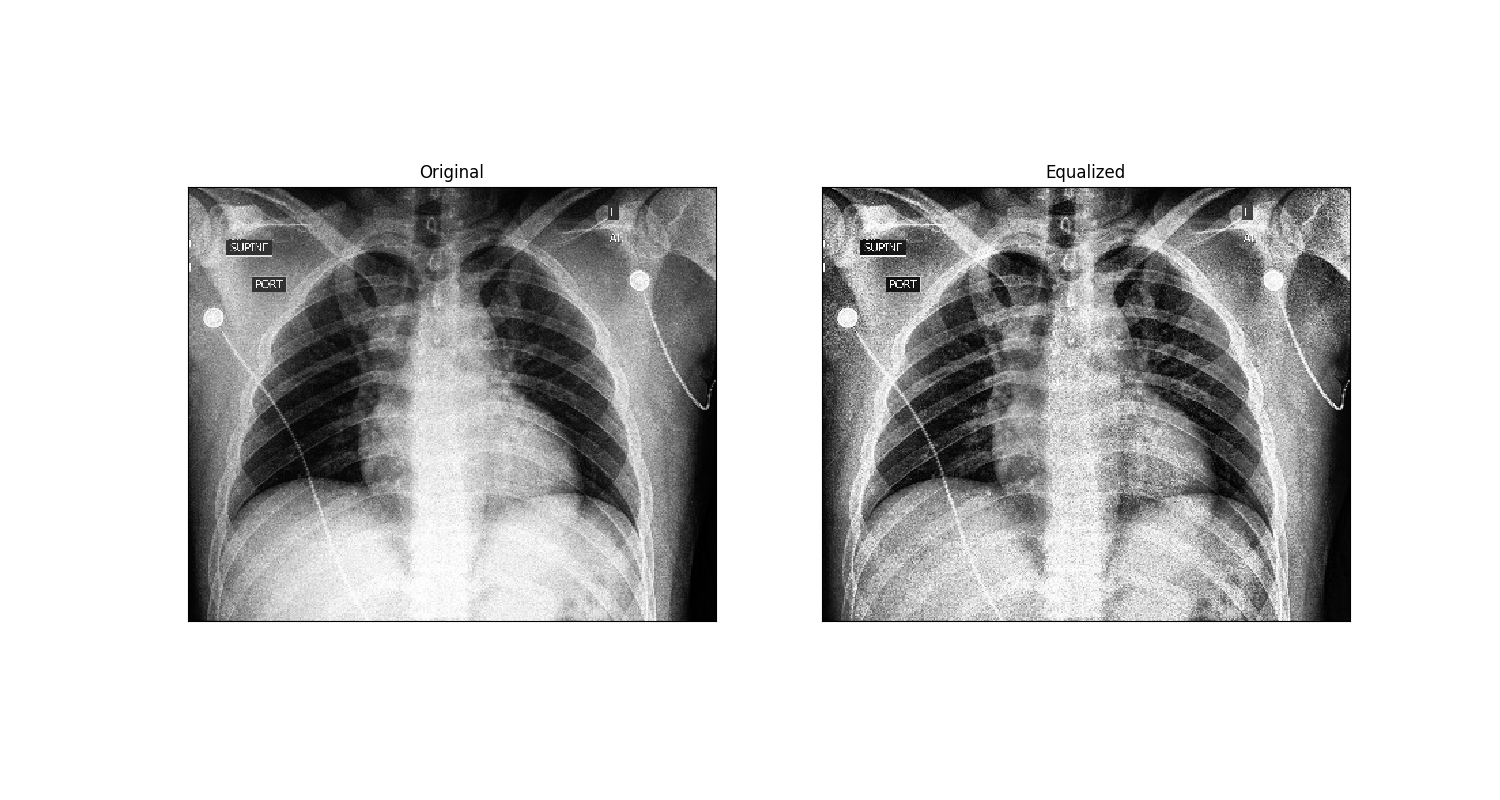

In [13]:
img_eq = equalize(np.squeeze(img))

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,8))

axes[0].set_title('Original')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_title('Equalized')
axes[1].set_xticks([])
axes[1].set_yticks([])


axes[0].imshow(np.squeeze(img),cmap='gray')

axes[1].imshow(np.squeeze(img_eq),cmap='gray')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

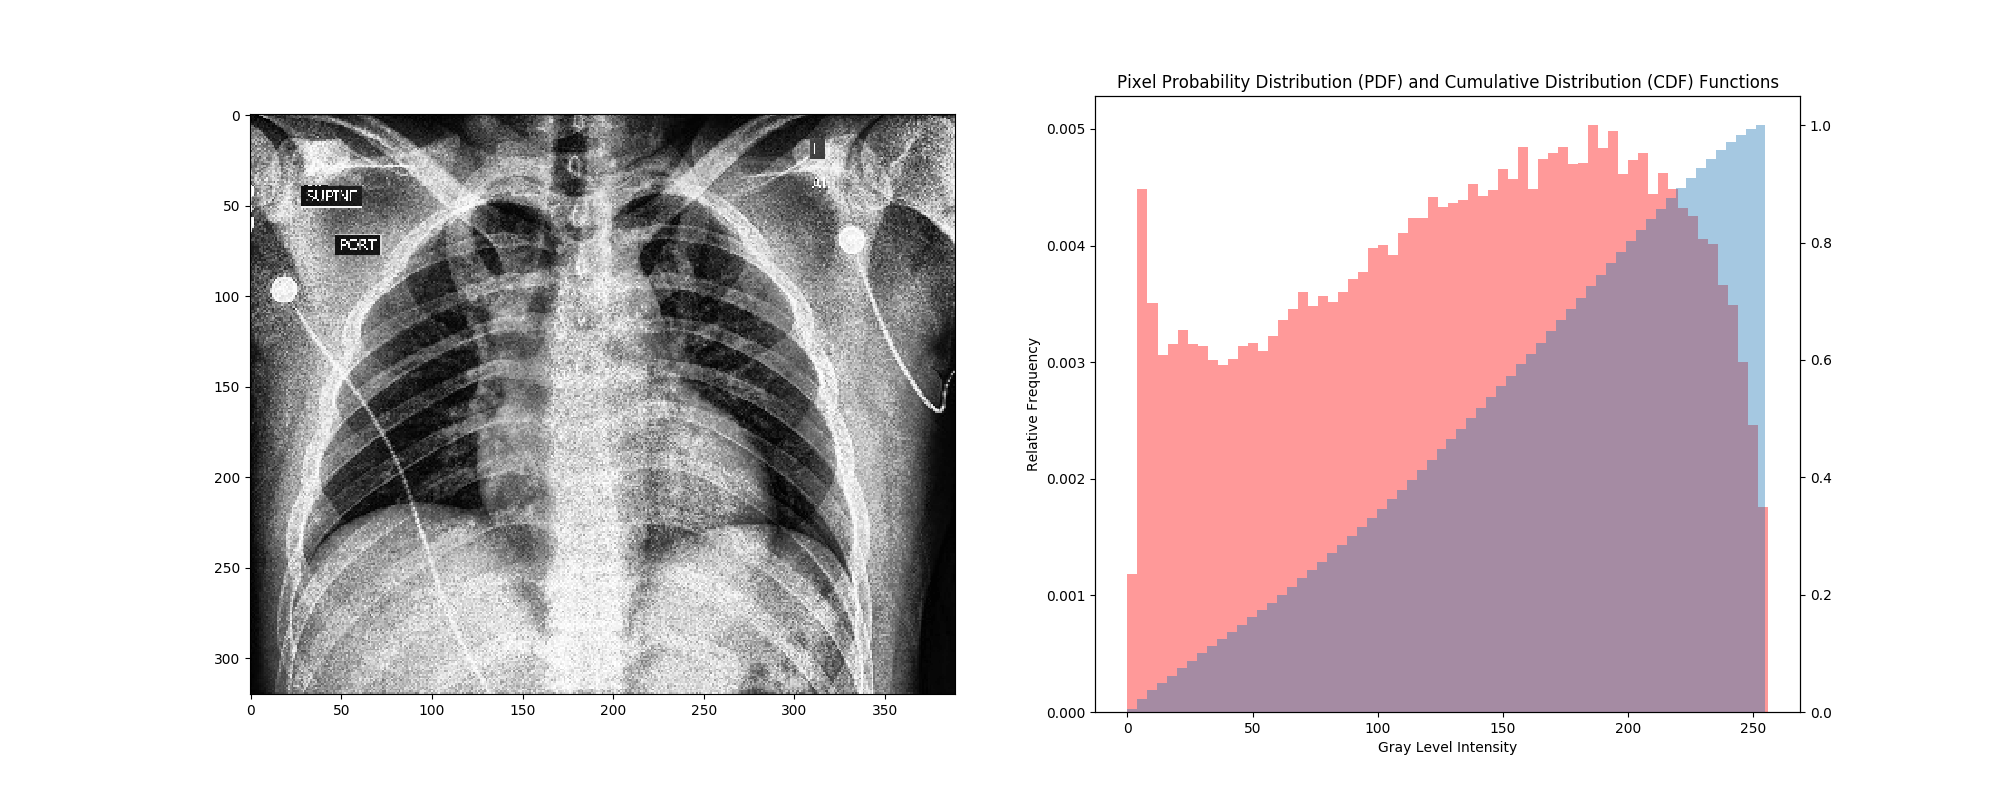

In [14]:
image =  img_eq.flatten()
#Display the histogram and CDF of the pixels of the image and extract the bins/CDF values
plt.subplots(nrows=1,ncols=2, figsize=(20,8))
plt.subplot(121)
plt.imshow(np.squeeze(img_eq),cmap='gray')
plt.subplot(122)
plt.hist(image, bins = 64, normed = True, color='red', alpha = 0.4,range= (0,256) )
plt.ylabel('Relative Frequency')
plt.xlabel('Gray Level Intensity')
plt.title('Pixel Probability Distribution (PDF) and Cumulative Distribution (CDF) Functions')
plt.twinx()
cdf, bins, patches = plt.hist(image, bins = 64, normed = True, cumulative=True, alpha = 0.4)
%matplot plt

### Image Augmentation/Curation

In order to generate more training images, we flip the original image across the vertical and horizontal axis plane. This technique is common in CV and prevents the model from overfitting

In [15]:
img_flip_vertical = cv2.flip(img_eq, 0)
img_flip_horizontal = cv2.flip(img_eq, 1)
img_flip_both = cv2.flip(img_eq, -1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

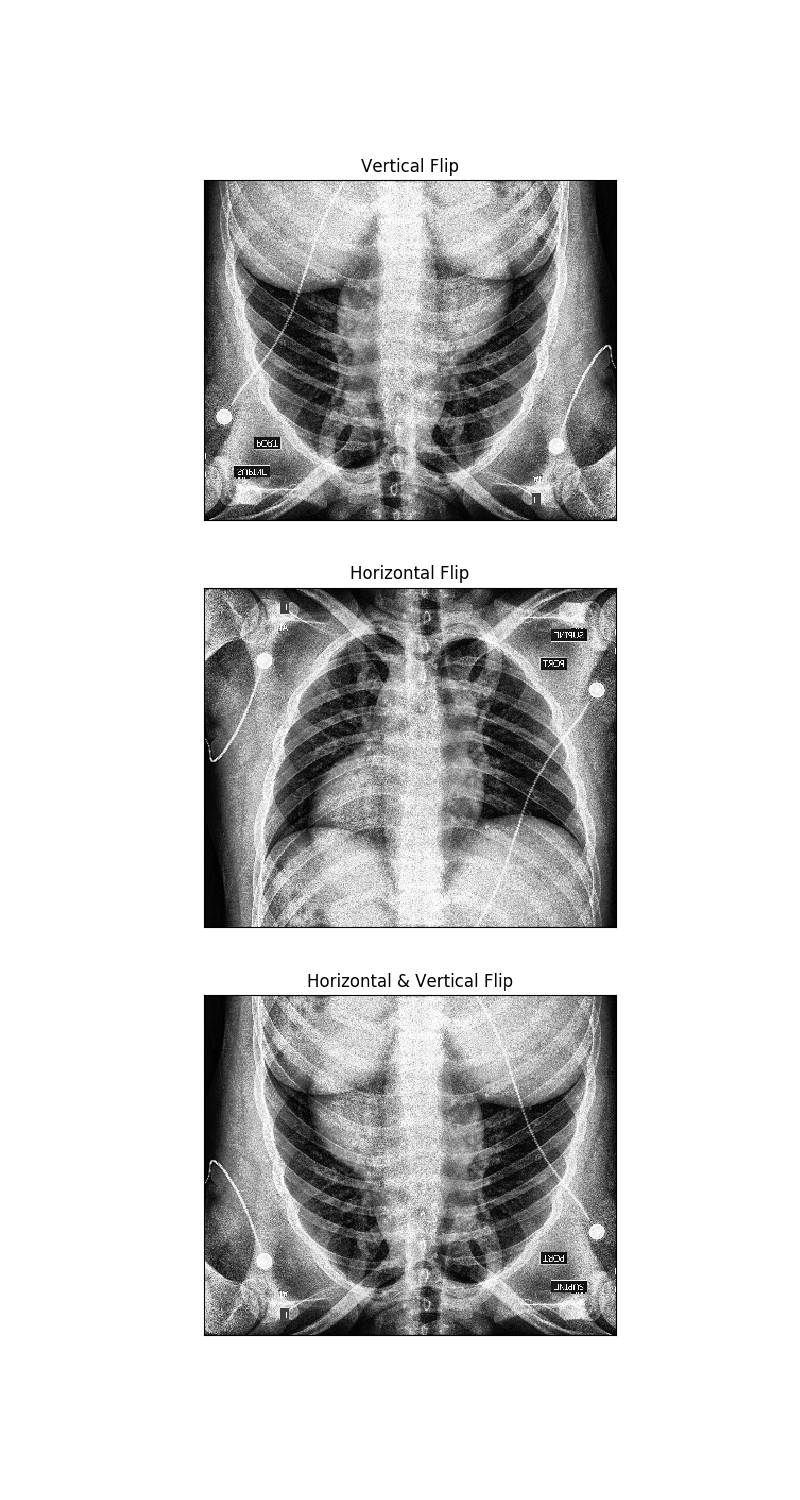

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,15))

axes[0].set_title('Vertical Flip')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_title('Horizontal Flip')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[2].set_title('Horizontal & Vertical Flip')
axes[2].set_xticks([])
axes[2].set_yticks([])


axes[0].imshow(np.squeeze(img_flip_vertical),cmap='gray')

axes[1].imshow(np.squeeze(img_flip_horizontal),cmap='gray')

axes[2].imshow(np.squeeze(img_flip_both), cmap='gray')
%matplot plt


### Image resizing

The classification model we intend to build will start with a "warm" start model, the ResNet InceptionNet V2. The recommended input shape for this model is \[batch, 299, 299, 3\], But this is purely due to the fully connected layer at the top of the model. A CNN can take in any input shape if no FC Layer is incorporated. We intend to chop off this layer, but for consistency sake, we will still reshape the images to (299,299)

In [17]:
img_reshape = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
print('Original Image Shape: {}'.format(img.shape))
print('Resized Image Shape: {}'.format(img_reshape.shape))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Original Image Shape: (320, 389, 1)
Resized Image Shape: (299, 299)

## Putting it all together

* Read in Images from S3 to Spark Cluster
* Convert the Images from Spark ImageSchema (and ByteArray) to a Numpy Array
* Extract the class label and image name from origin path
* Reisze the images
* Perform Contrast Limited Histogram Equalization
* Perform flip Augmented dataset
* Write back to S3

The code that follows should be compiled into a script so it can be submitted at command line as a spark job or it can be left as a notebook. If compiling as a pyspark job to be submitted, the spark context will have to be added to the top of the script. This is not necessary for a pyspark notebook as the spark context is automatically created with the notebook session

In [19]:
from pyspark.ml.image import ImageSchema
import cv2
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
#S3 BUCKET TO IMAGES WITH WILDCARD TO READ ALL IMAGES E.G. 's3://chexpert-small-dataset/valid/*/*.jpg'
s3_input = None
s3_output = None

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#read in data from S3
#remeber that the resulting data frame is Nx1
#where N is the number of images and the one column
#is the Spark ImageSchema Struct as noted at the top of this notebook
df = spark.read.format("image").load(input_path)

In [21]:
#Convert the ImageSchema Struct to a Numpy array and
#keep the origin attribute from ImageSchame Struct as well
df_rdd = df.rdd.map(lambda x: (x[0].origin, ImageSchema.toNDArray(x[0])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
#Extract the class for each image from the origin (The S3 location)
#E.g.origin = s3://chexpert-small-dataset/valid/Enlarged_Cardiomediastinum/frontal_424.jpg
#Need to extract 'Enlarged_Cardiomediastinum' from the origin
#current rdd structure (origin, numpy array)
#return (image_name, numpy array, classification)
df_rdd = df_rdd.map(lambda x: (x[0].split('/')[-1].split('.')[0], x[1], x[0].split('/')[-2]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
#get the distinct list of classes now before the op becomes to expensive later
#after image augmentation
classes = df_rdd.map(lambda x: (x[2])).distinct().collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
#Function to apply Contrast Limited Histogram Equalization
def resize_and_equalize(img):
    #grayscale image shape is (H,W,1) where 1 is the number of channels
    #need to remove this dimension before applying equalization and resizing
    img = np.squeeze(img)
    #resize to (299,299)
    img = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA)
    
    #equalize
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    #add channel dimension back and return equalized image
    return img

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
#equalize images
df_rdd = df_rdd.map(lambda x: (x[0], resize_and_equalize(x[1]), x[2]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
#Flip Image Generator
#This generator takes in a row and creates 4 images in return
#1.) The original Image
#2.) Flipped Vertically
#3.) Flipped Horizontally
#4.) Flipped Both
#It is a generator, not a function so a flatMap operation must be performed to generate 
#the actual data. Wrap the return statement in a list which is then removed from the flatMap op
def create_flipped_image(row):
    
    name = row[0]
    np_img = row[1]
    class_ = row[2]

    
    for i in range(4):
        if i == 0:
            yield [(name, np_img, class_)]
        elif i == 1:
            yield [(name + '_axialflip', cv2.flip(np_img, i-2), class_)]
        elif i == 2:
            yield [(name + '_verticalflip', cv2.flip(np_img, i-2), class_)]
        else:
            yield [(name + '_horizontalflip', cv2.flip(np_img, i-2), class_)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
#Generate flipped images
df_rdd = df_rdd.flatMap(create_flipped_image).map(lambda x: x[0])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
print('Original Count of Images: {}'.format(df.count()))
print('Count of Images After Preprocessing: {}'.format(df_rdd.count()))

In [ ]:
test = df_rdd.take(1)

In [ ]:
'/valid/'+test[0][2]+ '/' + test[0][0] + '.jpg'

In [29]:
# Copyright 2010-2019 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#
# This file is licensed under the Apache License, Version 2.0 (the "License").
# You may not use this file except in compliance with the License. A copy of the
# License is located at
#
# http://aws.amazon.com/apache2.0/
#
# This file is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS
# OF ANY KIND, either express or implied. See the License for the specific
# language governing permissions and limitations under the License.

import logging
import boto3
from botocore.exceptions import ClientError


def put_object(dest_bucket_name, dest_object_name, src_data):
    """Add an object to an Amazon S3 bucket

    The src_data argument must be of type bytes or a string that references
    a file specification.

    :param dest_bucket_name: string
    :param dest_object_name: string
    :param src_data: bytes of data or string reference to file spec
    :return: True if src_data was added to dest_bucket/dest_object, otherwise
    False
    """

    # Construct Body= parameter
    if isinstance(src_data, bytes):
        object_data = src_data
    elif isinstance(src_data, str):
        try:
            object_data = open(src_data, 'rb')
            # possible FileNotFoundError/IOError exception
        except Exception as e:
            logging.error(e)
            return False
    else:
        logging.error('Type of ' + str(type(src_data)) +
                      ' for the argument \'src_data\' is not supported.')
        return False

    # Put the object
    s3 = boto3.client('s3')
    try:
        s3.put_object(Bucket=dest_bucket_name, Key=dest_object_name, Body=object_data)
    except ClientError as e:
        # AllAccessDisabled error == bucket not found
        # NoSuchKey or InvalidRequest error == (dest bucket/obj == src bucket/obj)
        logging.error(e)
        return print(False)
    finally:
        if isinstance(src_data, str):
            object_data.close()
    return print(True)


# def main():
#     """Exercise put_object()"""

#     # Assign these values before running the program
#     test_bucket_name = "chexpert-small-dataset"
#     test_object_name = 'test.jpg'
#     filename = image_string
#     # Alternatively, specify object contents using bytes.
#     # filename = b'This is the data to store in the S3 object.'

#     # Set up logging
#     logging.basicConfig(level=logging.DEBUG,
#                         format='%(levelname)s: %(asctime)s: %(message)s')

#     # Put the object into the bucket
#     success = put_object(test_bucket_name, test_object_name, filename)
#     if success:
#         logging.info(f'Added {test_object_name} to {test_bucket_name}')


# main()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
bucket_name = 'chexpert-small-dataset'
for c in ['Pleural_Other']:
    print('collecting data')
    data = df_rdd.filter(lambda x: x[2] == c).take(10)
    print('data collected')
    for item in data:
        print('working on data')
        object_name = '/valid/'+item[2]+ '/' + item[0] + '.jpg'
        object_bytes_string = cv2.imencode('.jpg', item[1])[1].tostring()
        
        success = put_object(bucket_name, object_name, object_bytes_string)
        print(success)
        

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

collecting data
data collected
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None
working on data
True
None

In [ ]:
print('hello')